## **Data Exploration**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data = pd.read_csv('cardio_train.csv', sep=';')

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data = data.drop('id', axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
print(data.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


## **Removing Outliers**

In [8]:
data.drop(data[(data['height'] > data['height'].quantile(0.99)) | (data['height'] < data['height'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.99)) | (data['weight'] < data['weight'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.99)) | (data['ap_hi'] < data['ap_hi'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.99)) | (data['ap_lo'] < data['ap_lo'].quantile(0.01))].index,inplace=True)
len(data)

66532

In [9]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,19471.713146,1.348900,164.465460,73.837733,126.624902,90.024680,1.362337,1.224103,0.087371,0.053057,0.804260,0.496814
std,2463.232418,0.476626,7.311396,12.902688,16.032104,89.202894,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994
min,10798.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17674.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,184.000000,117.000000,180.000000,1000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## **Data Transformation**

In [10]:
data['age'] = (data['age'] / 365).round().astype('int')

print(data.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [11]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
data['age_group'] = pd.cut(data['age'], bins=7, labels=range(7), include_lowest=True,right=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


In [12]:
data['bmi'] = data['weight']/((data['height']/100)**2)
data.head()

bmiMin = int(data['bmi'].min())
bmiMax = int(data['bmi'].max())

print(bmiMin, bmiMax)

data['bmi'] = pd.cut(data['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()


data["bmi"].value_counts(normalize=True)

15 52


1    0.536013
2    0.300833
3    0.092061
0    0.053448
4    0.016488
5    0.001157
Name: bmi, dtype: float64

In [13]:
data['map'] = ((2* data['ap_lo']) + data['ap_hi']) / 3

mapMin = int(data['map'].min())
mapMax = int(data['map'].max())

print(mapMin, mapMax)

data['map'] = pd.cut(data['map'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()

70 726


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,0
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,0
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


In [14]:
null_rows = data[data.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_group, bmi, map]
Index: []


In [15]:
data=data.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)

data.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,0
1,1,3,1,0,0,1,1,4,3,0
2,1,3,1,0,0,0,1,4,1,0
3,2,1,1,0,0,1,1,3,2,0
4,1,1,1,0,0,0,0,3,1,0


In [16]:
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,0.348900,0.362337,0.224103,0.087371,0.053057,0.804260,0.496814,4.044144,1.485601,0.038012
std,0.476626,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994,1.379105,0.808479,0.386662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,0.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,4.000000


## **Clustering**

In [18]:
cost = []
num_clusters = range(1,9) # 1 to 8
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 8, verbose=0,random_state=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

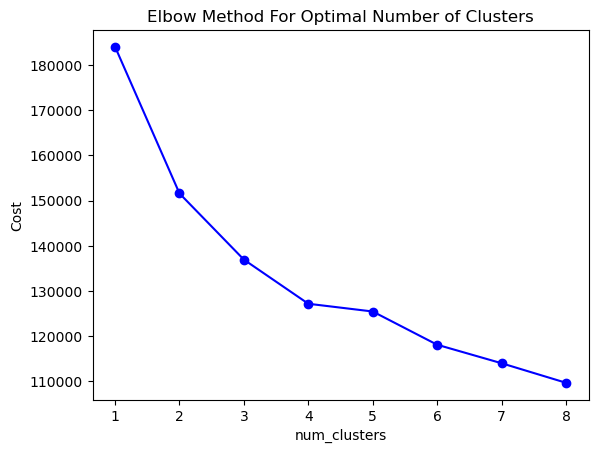

In [19]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [20]:
km = KModes(n_clusters=2, init = "Huang", n_init = 8,random_state=42)
clusters = km.fit_predict(data)
clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [21]:
data.insert(0,"clusters",clusters,True)

data.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,0,1,0,0,0,0,1,0,3,1,0
1,0,0,2,0,0,0,1,1,4,3,0
2,0,0,2,0,0,0,0,1,4,1,0
3,1,1,0,0,0,0,1,1,3,2,0
4,0,0,0,0,0,0,0,0,3,1,0


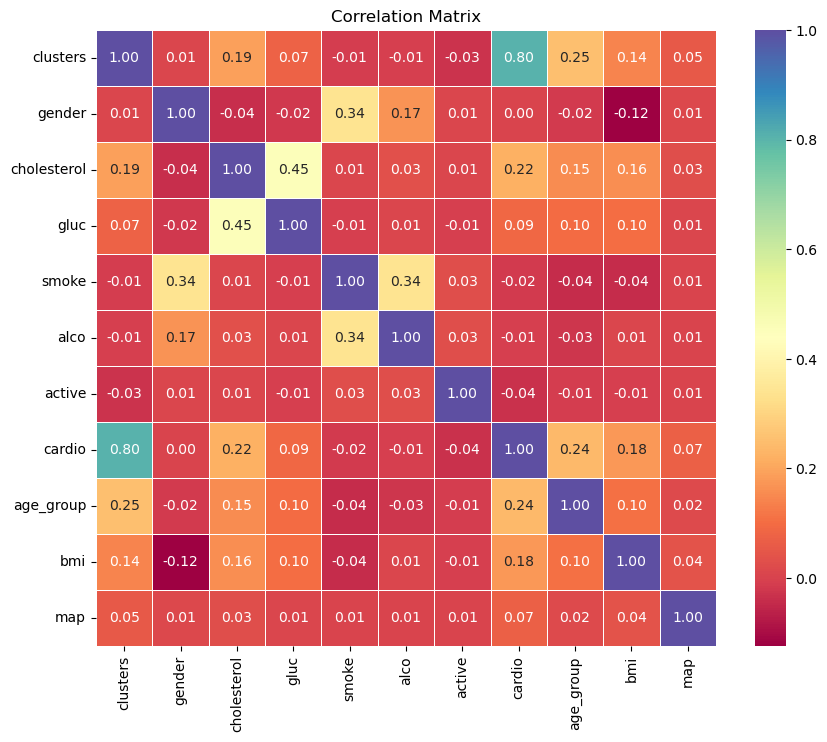

In [22]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

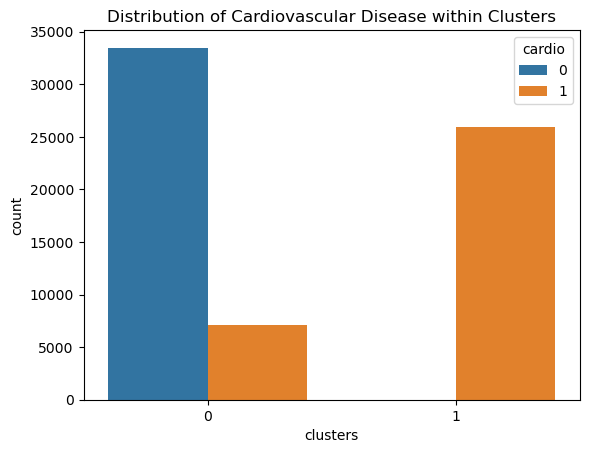

In [23]:
sns.countplot(x='clusters', hue='cardio', data=data)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()

## **Split and Train Data**

In [51]:
x = data.drop(['cardio', 'gender', 'alco', 'smoke'], axis=1)
y = data['cardio']

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66532 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     66532 non-null  uint16
 1   cholesterol  66532 non-null  int64 
 2   gluc         66532 non-null  int64 
 3   active       66532 non-null  int64 
 4   age_group    66532 non-null  int64 
 5   bmi          66532 non-null  int64 
 6   map          66532 non-null  int64 
dtypes: int64(6), uint16(1)
memory usage: 3.7 MB


In [53]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [54]:
# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Oversample the minority class
majority_class_indices = np.where(y == 0)[0]
minority_class_indices = np.where(y == 1)[0]

majority_class_samples = x_scaled[majority_class_indices]
minority_class_samples = x_scaled[minority_class_indices]
minority_class_samples_upsampled = resample(minority_class_samples,
                                            replace=True,
                                            n_samples=len(majority_class_samples),
                                            random_state=42)

# Concatenate the upsampled minority class samples with the original majority class samples
x_augmented = np.concatenate((majority_class_samples, minority_class_samples_upsampled), axis=0)

# Create the corresponding target labels for the augmented data
y_majority = np.zeros(len(majority_class_samples))
y_minority_upsampled = np.ones(len(minority_class_samples_upsampled))
y_augmented = np.concatenate((y_majority, y_minority_upsampled), axis=0)

# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)


In [55]:
# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)

# Split the augmented data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_augmented_scaled, y_augmented, test_size=0.2, random_state=42)

print("Training data (x):")
print(x_train)
print("\nTraining data (y):")
print(y_train)
print("\nTesting data (x):")
print(x_test)
print("\nTesting data (y):")
print(y_test)

Training data (x):
[[ 1.27592424 -0.30305502  1.53430145 ...  1.43954137 -0.51162314
  -0.23817494]
 [-0.78474783 -0.545905   -0.39044495 ... -0.03216961 -0.52232144
  -0.08192247]
 [-0.86061274 -0.49677458 -0.33369306 ... -0.09110585 -0.79234177
  -0.04580662]
 ...
 [ 1.48034525  2.2986625  -0.40405744 ...  1.18311013  0.60009222
  -0.16967629]
 [-0.81307987 -0.5321885  -0.44516479 ... -0.65177138  0.47113913
  -0.04285536]
 [-0.8727328  -0.43873499 -0.43523182 ... -0.75092993 -0.75878825
   0.00305059]]

Training data (y):
[1. 1. 0. ... 1. 0. 0.]

Testing data (x):
[[ 1.24573281 -0.53112369 -0.42858243 ...  0.66119047  0.54026101
   0.02681023]
 [ 1.26203124  0.77662525 -0.34766826 ...  0.65348018  0.44460396
  -0.26327166]
 [-0.86955193  2.68867588 -0.40482917 ... -0.73756305 -0.65306649
   0.06807882]
 ...
 [ 1.3695481   0.92215594 -0.40593024 ...  0.77039683 -0.50240425
  -0.08495553]
 [ 1.27814378 -0.49507873 -0.32697914 ...  1.56392615  0.5731905
  -0.17295974]
 [-0.83250781 -0.

In [56]:
from sklearn.ensemble import RandomForestClassifier

### **RNN MODEL**

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, ReLU

In [58]:
# Define the RNN model architecture
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size=7, hidden_size=16, num_layers=1, batch_first=True)
        self.fc = nn.Linear(16, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        # If out has 3 dimensions, select the last time step output
        if len(out.shape) == 3:
            out = self.fc(out[:, -1, :])
        # If out has 2 dimensions (sequence length is 1), directly pass through the fully connected layer
        elif len(out.shape) == 2:
            out = self.fc(out)
        out = torch.sigmoid(out)
        return out




In [59]:
# Create the KDNN model using Keras
def create_kdnn_model():
    model = Sequential()
    model.add(Dense(16, input_dim=7))
    model.add(ReLU())
    model.add(Dense(12))
    model.add(ReLU())
    model.add(Dense(8))
    model.add(ReLU())
    model.add(Dense(4))
    model.add(ReLU())
    model.add(Dense(1, activation='sigmoid'))
    return model


In [60]:
def preprocess_data(X_train, y_train, batch_size):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    return train_loader

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [62]:
# Train the PyTorch model
def train_pytorch_model(model, train_loader, epochs, print_interval):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % print_interval == 0 or epoch == 0:
            average_loss = total_loss / len(train_loader)
            print(f'Epoch {epoch+1}/{epochs}, Average Loss: {average_loss}')

    # Calculate final accuracy and confusion matrix
    final_predicted_labels = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_labels.extend(torch.round(outputs).detach().numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate final accuracy and confusion matrix
    final_accuracy = accuracy_score(final_true_labels, final_predicted_labels)
    final_confusion_matrix = confusion_matrix(final_true_labels, final_predicted_labels)
    print('Final Accuracy:', final_accuracy)
    print('Final Confusion Matrix:')
    print(final_confusion_matrix)

rnn_model = RNNModel()
batch_size = 64
epochs = 100
print_interval = 5
train_loader = preprocess_data(x_train, y_train, batch_size)
train_pytorch_model(rnn_model, train_loader, epochs, print_interval)

Epoch 1/100, Average Loss: 0.366840325108993
Epoch 5/100, Average Loss: 0.16303766109360873
Epoch 10/100, Average Loss: 0.15115546488081824
Epoch 15/100, Average Loss: 0.1490162885664398
Epoch 20/100, Average Loss: 0.14820287466102602
Epoch 25/100, Average Loss: 0.14766660169336673
Epoch 30/100, Average Loss: 0.14750462419741756
Epoch 35/100, Average Loss: 0.1470877088544047
Epoch 40/100, Average Loss: 0.14705696183489358
Epoch 45/100, Average Loss: 0.1468250244108152
Epoch 50/100, Average Loss: 0.14679636277943814
Epoch 55/100, Average Loss: 0.14672809167183143
Epoch 60/100, Average Loss: 0.14661907516820458
Epoch 65/100, Average Loss: 0.14653610102520764
Epoch 70/100, Average Loss: 0.1465712604841736
Epoch 75/100, Average Loss: 0.14641089378683655
Epoch 80/100, Average Loss: 0.14631779568899633
Epoch 85/100, Average Loss: 0.14616640690122168
Epoch 90/100, Average Loss: 0.14618074982076562
Epoch 95/100, Average Loss: 0.14621128424503613
Epoch 100/100, Average Loss: 0.14610489170326268

In [63]:
# Function to calculate ROC curve
def calculate_roc_curve(model, train_loader):
    final_predicted_probs = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_probs.extend(outputs.numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(final_true_labels, final_predicted_probs)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


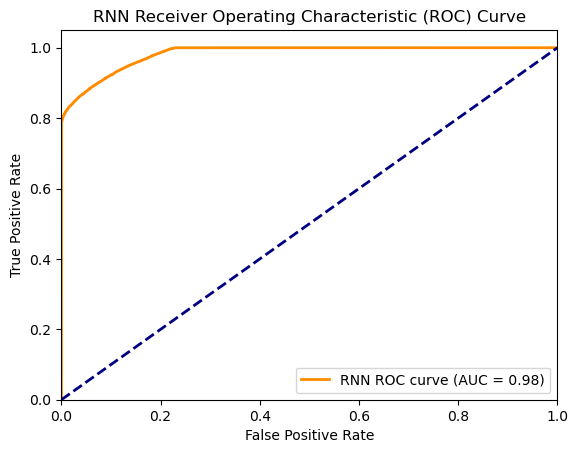

In [64]:
fpr, tpr, roc_auc = calculate_roc_curve(rnn_model, train_loader)
plot_roc_curve(fpr, tpr, roc_auc, 'RNN')

### **KDNN MODEL**

In [65]:
# Train the KDNN model using Keras
kdnn_model = create_kdnn_model()
kdnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
kdnn_model.fit( x_train, y_train, epochs=40, batch_size=batch_size)

Epoch 1/40
837/837 [==============================] - 0s 380us/step - loss: 0.3164 - accuracy: 0.8781
Epoch 2/40
837/837 [==============================] - 0s 381us/step - loss: 0.1848 - accuracy: 0.9031
Epoch 3/40
837/837 [==============================] - 0s 365us/step - loss: 0.1569 - accuracy: 0.9074
Epoch 4/40
837/837 [==============================] - 0s 366us/step - loss: 0.1531 - accuracy: 0.9091
Epoch 5/40
837/837 [==============================] - 0s 384us/step - loss: 0.1512 - accuracy: 0.9101
Epoch 6/40
837/837 [==============================] - 0s 372us/step - loss: 0.1502 - accuracy: 0.9111
Epoch 7/40
837/837 [==============================] - 0s 363us/step - loss: 0.1490 - accuracy: 0.9122
Epoch 8/40
837/837 [==============================] - 0s 366us/step - loss: 0.1481 - accuracy: 0.9121
Epoch 9/40
837/837 [==============================] - 0s 365us/step - loss: 0.1481 - accuracy: 0.9120
Epoch 10/40
837/837 [==============================] - 0s 378us/step - loss: 0.147

419/419 [==============================] - 0s 247us/step


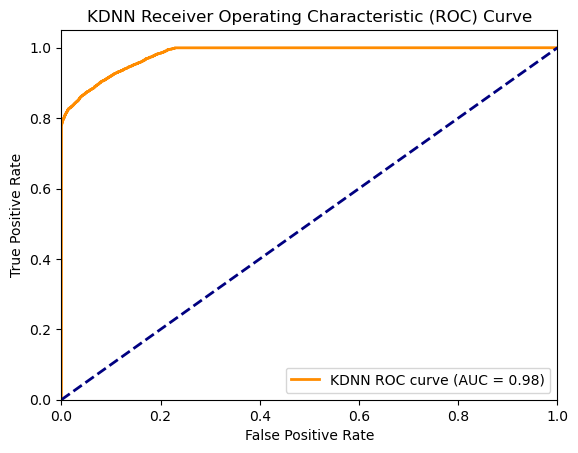

In [66]:
def calculate_roc_curve(model, X_test, y_test):
    y_pred = model.predict(X_test).ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

fpr, tpr, roc_auc = calculate_roc_curve(kdnn_model, x_test, y_test)
plot_roc_curve(fpr, tpr, roc_auc, 'KDNN')

### **ML ALGORITHMS**

In [67]:
!pip install catboost
from catboost import CatBoostClassifier

In [68]:
!pip install xgboost

Learning rate set to 0.056385
0:	learn: 0.5548911	total: 11.4ms	remaining: 11.4s
1:	learn: 0.4543139	total: 17.3ms	remaining: 8.63s
2:	learn: 0.3779071	total: 21.8ms	remaining: 7.24s
3:	learn: 0.3260264	total: 26.4ms	remaining: 6.58s
4:	learn: 0.2885512	total: 32ms	remaining: 6.37s
5:	learn: 0.2583043	total: 37.6ms	remaining: 6.23s
6:	learn: 0.2339363	total: 43.1ms	remaining: 6.11s
7:	learn: 0.2168127	total: 48.2ms	remaining: 5.98s
8:	learn: 0.2028717	total: 53.1ms	remaining: 5.84s
9:	learn: 0.1973863	total: 58.4ms	remaining: 5.78s
10:	learn: 0.1894883	total: 63.3ms	remaining: 5.69s
11:	learn: 0.1831307	total: 67.8ms	remaining: 5.58s
12:	learn: 0.1781223	total: 72.8ms	remaining: 5.53s
13:	learn: 0.1732326	total: 77.9ms	remaining: 5.49s
14:	learn: 0.1693117	total: 83.1ms	remaining: 5.46s
15:	learn: 0.1669514	total: 88ms	remaining: 5.41s
16:	learn: 0.1640001	total: 92.9ms	remaining: 5.37s
17:	learn: 0.1625972	total: 97.5ms	remaining: 5.32s
18:	learn: 0.1613525	total: 102ms	remaining: 5.2

188:	learn: 0.1436794	total: 993ms	remaining: 4.26s
189:	learn: 0.1436051	total: 998ms	remaining: 4.25s
190:	learn: 0.1435652	total: 1s	remaining: 4.25s
191:	learn: 0.1435378	total: 1.01s	remaining: 4.24s
192:	learn: 0.1435128	total: 1.01s	remaining: 4.23s
193:	learn: 0.1434363	total: 1.02s	remaining: 4.23s
194:	learn: 0.1434004	total: 1.02s	remaining: 4.22s
195:	learn: 0.1433592	total: 1.03s	remaining: 4.22s
196:	learn: 0.1432841	total: 1.03s	remaining: 4.21s
197:	learn: 0.1432543	total: 1.04s	remaining: 4.21s
198:	learn: 0.1432164	total: 1.04s	remaining: 4.2s
199:	learn: 0.1431677	total: 1.05s	remaining: 4.2s
200:	learn: 0.1431180	total: 1.05s	remaining: 4.19s
201:	learn: 0.1430851	total: 1.06s	remaining: 4.19s
202:	learn: 0.1430363	total: 1.06s	remaining: 4.18s
203:	learn: 0.1429721	total: 1.07s	remaining: 4.17s
204:	learn: 0.1429260	total: 1.07s	remaining: 4.17s
205:	learn: 0.1428767	total: 1.08s	remaining: 4.16s
206:	learn: 0.1428339	total: 1.08s	remaining: 4.15s
207:	learn: 0.142

350:	learn: 0.1360410	total: 1.8s	remaining: 3.32s
351:	learn: 0.1360002	total: 1.8s	remaining: 3.31s
352:	learn: 0.1359719	total: 1.81s	remaining: 3.31s
353:	learn: 0.1359318	total: 1.81s	remaining: 3.3s
354:	learn: 0.1358744	total: 1.81s	remaining: 3.3s
355:	learn: 0.1358413	total: 1.82s	remaining: 3.29s
356:	learn: 0.1358052	total: 1.82s	remaining: 3.29s
357:	learn: 0.1357696	total: 1.83s	remaining: 3.28s
358:	learn: 0.1357352	total: 1.83s	remaining: 3.27s
359:	learn: 0.1356795	total: 1.84s	remaining: 3.27s
360:	learn: 0.1356135	total: 1.84s	remaining: 3.26s
361:	learn: 0.1355720	total: 1.85s	remaining: 3.25s
362:	learn: 0.1355171	total: 1.85s	remaining: 3.25s
363:	learn: 0.1354927	total: 1.86s	remaining: 3.25s
364:	learn: 0.1354290	total: 1.86s	remaining: 3.24s
365:	learn: 0.1353924	total: 1.87s	remaining: 3.23s
366:	learn: 0.1353417	total: 1.87s	remaining: 3.23s
367:	learn: 0.1353017	total: 1.88s	remaining: 3.22s
368:	learn: 0.1352644	total: 1.88s	remaining: 3.22s
369:	learn: 0.13

509:	learn: 0.1296351	total: 2.59s	remaining: 2.49s
510:	learn: 0.1295873	total: 2.6s	remaining: 2.48s
511:	learn: 0.1295579	total: 2.6s	remaining: 2.48s
512:	learn: 0.1295179	total: 2.61s	remaining: 2.48s
513:	learn: 0.1294763	total: 2.61s	remaining: 2.47s
514:	learn: 0.1294419	total: 2.62s	remaining: 2.46s
515:	learn: 0.1294077	total: 2.62s	remaining: 2.46s
516:	learn: 0.1293855	total: 2.63s	remaining: 2.45s
517:	learn: 0.1293568	total: 2.63s	remaining: 2.45s
518:	learn: 0.1293171	total: 2.64s	remaining: 2.44s
519:	learn: 0.1292933	total: 2.64s	remaining: 2.44s
520:	learn: 0.1292541	total: 2.65s	remaining: 2.43s
521:	learn: 0.1292004	total: 2.65s	remaining: 2.43s
522:	learn: 0.1291590	total: 2.66s	remaining: 2.42s
523:	learn: 0.1291180	total: 2.66s	remaining: 2.42s
524:	learn: 0.1290830	total: 2.67s	remaining: 2.41s
525:	learn: 0.1290482	total: 2.67s	remaining: 2.41s
526:	learn: 0.1290127	total: 2.67s	remaining: 2.4s
527:	learn: 0.1289575	total: 2.68s	remaining: 2.4s
528:	learn: 0.12

669:	learn: 0.1238540	total: 3.39s	remaining: 1.67s
670:	learn: 0.1238129	total: 3.4s	remaining: 1.67s
671:	learn: 0.1237606	total: 3.4s	remaining: 1.66s
672:	learn: 0.1237281	total: 3.41s	remaining: 1.66s
673:	learn: 0.1236949	total: 3.41s	remaining: 1.65s
674:	learn: 0.1236505	total: 3.42s	remaining: 1.65s
675:	learn: 0.1236311	total: 3.42s	remaining: 1.64s
676:	learn: 0.1235999	total: 3.43s	remaining: 1.64s
677:	learn: 0.1235791	total: 3.43s	remaining: 1.63s
678:	learn: 0.1235394	total: 3.44s	remaining: 1.63s
679:	learn: 0.1235058	total: 3.44s	remaining: 1.62s
680:	learn: 0.1234751	total: 3.45s	remaining: 1.61s
681:	learn: 0.1234284	total: 3.45s	remaining: 1.61s
682:	learn: 0.1233867	total: 3.46s	remaining: 1.6s
683:	learn: 0.1233528	total: 3.46s	remaining: 1.6s
684:	learn: 0.1233356	total: 3.47s	remaining: 1.59s
685:	learn: 0.1233050	total: 3.47s	remaining: 1.59s
686:	learn: 0.1232692	total: 3.48s	remaining: 1.58s
687:	learn: 0.1232294	total: 3.48s	remaining: 1.58s
688:	learn: 0.12

829:	learn: 0.1186277	total: 4.2s	remaining: 860ms
830:	learn: 0.1185829	total: 4.2s	remaining: 855ms
831:	learn: 0.1185318	total: 4.21s	remaining: 850ms
832:	learn: 0.1184992	total: 4.21s	remaining: 845ms
833:	learn: 0.1184884	total: 4.22s	remaining: 840ms
834:	learn: 0.1184420	total: 4.22s	remaining: 835ms
835:	learn: 0.1184159	total: 4.23s	remaining: 830ms
836:	learn: 0.1183898	total: 4.23s	remaining: 825ms
837:	learn: 0.1183542	total: 4.24s	remaining: 819ms
838:	learn: 0.1183272	total: 4.24s	remaining: 814ms
839:	learn: 0.1182941	total: 4.25s	remaining: 809ms
840:	learn: 0.1182527	total: 4.25s	remaining: 804ms
841:	learn: 0.1182219	total: 4.26s	remaining: 799ms
842:	learn: 0.1181862	total: 4.26s	remaining: 794ms
843:	learn: 0.1181512	total: 4.27s	remaining: 789ms
844:	learn: 0.1181055	total: 4.27s	remaining: 784ms
845:	learn: 0.1180835	total: 4.28s	remaining: 779ms
846:	learn: 0.1180650	total: 4.29s	remaining: 774ms
847:	learn: 0.1180300	total: 4.29s	remaining: 769ms
848:	learn: 0.

988:	learn: 0.1136872	total: 5s	remaining: 55.6ms
989:	learn: 0.1136554	total: 5.01s	remaining: 50.6ms
990:	learn: 0.1136287	total: 5.01s	remaining: 45.5ms
991:	learn: 0.1135888	total: 5.02s	remaining: 40.5ms
992:	learn: 0.1135692	total: 5.02s	remaining: 35.4ms
993:	learn: 0.1135204	total: 5.03s	remaining: 30.4ms
994:	learn: 0.1134927	total: 5.03s	remaining: 25.3ms
995:	learn: 0.1134667	total: 5.04s	remaining: 20.2ms
996:	learn: 0.1134251	total: 5.04s	remaining: 15.2ms
997:	learn: 0.1133985	total: 5.05s	remaining: 10.1ms
998:	learn: 0.1133681	total: 5.05s	remaining: 5.06ms
999:	learn: 0.1133408	total: 5.06s	remaining: 0us
KNN Metrics:
Accuracy: 0.9036
Precision: 0.9100
Recall: 0.8972
F1 Score: 0.9035
ROC AUC Score: 0.9036


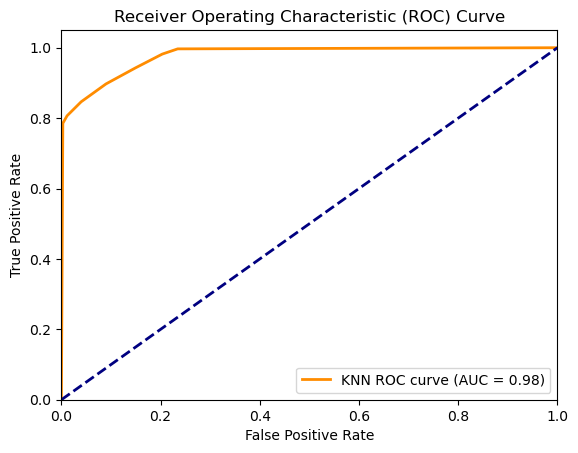

Decision Tree Metrics:
Accuracy: 0.9087
Precision: 0.9374
Recall: 0.8771
F1 Score: 0.9062
ROC AUC Score: 0.9089


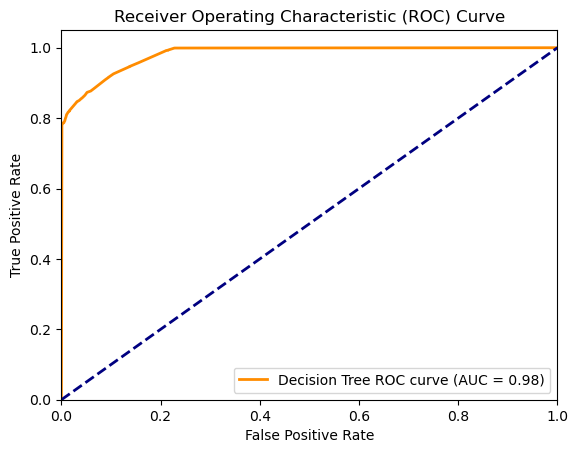

Random Forest Metrics:
Accuracy: 0.9085
Precision: 0.9679
Recall: 0.8461
F1 Score: 0.9029
ROC AUC Score: 0.9088


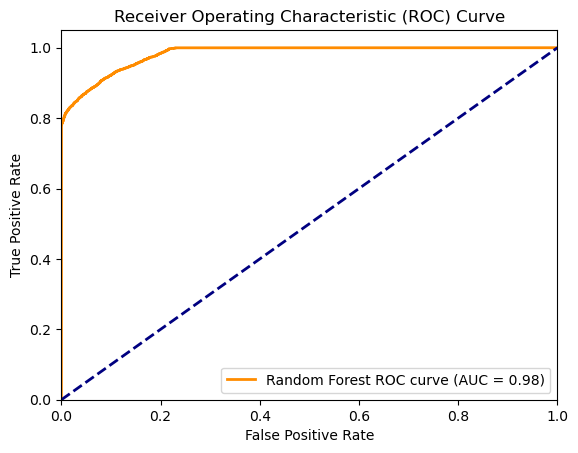

CatBoost Metrics:
Accuracy: 0.9074
Precision: 0.9275
Recall: 0.8851
F1 Score: 0.9058
ROC AUC Score: 0.9075


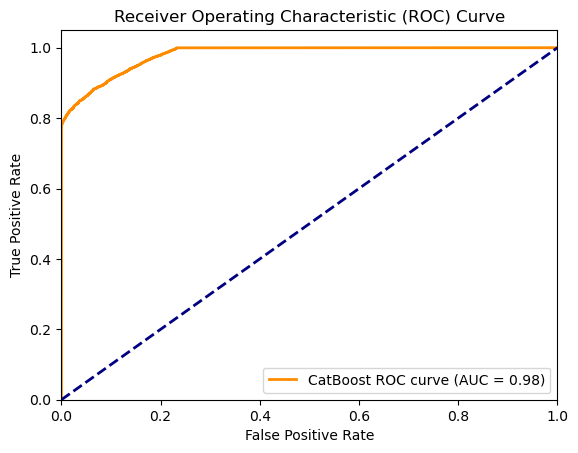

XGBoost Metrics:
Accuracy: 0.9105
Precision: 0.9404
Recall: 0.8777
F1 Score: 0.9080
ROC AUC Score: 0.9107


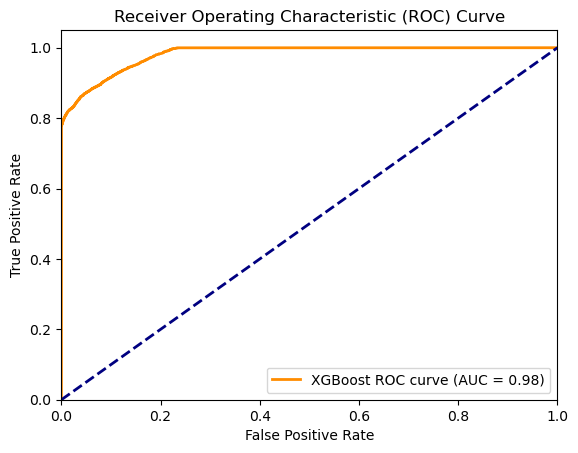

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to calculate ROC curve
def calculate_roc_curve(model, x_test, y_test):
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    return fpr, tpr, roc_auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Initialize KNN model with GridSearchCV
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy')
knn_grid.fit(x_train, y_train)
knn_model = knn_grid.best_estimator_

# Initialize Decision Tree model with GridSearchCV
dt_model = DecisionTreeClassifier(random_state=1)
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='accuracy')
dt_grid.fit(x_train, y_train)
dt_model = dt_grid.best_estimator_

# Initialize Random Forest model with GridSearchCV
rf_model = RandomForestClassifier(random_state=1)
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid.fit(x_train, y_train)
rf_model = rf_grid.best_estimator_

# Initialize CatBoost model
catboost_model = CatBoostClassifier(random_state=1)
# Train CatBoost model
catboost_model.fit(x_train, y_train)

# Initialize XGBoost model with Extreme Gradient Boosting
xgb_model = XGBClassifier(random_state=1, booster='gbtree')
xgb_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy')
xgb_grid.fit(x_train, y_train)
xgb_model = xgb_grid.best_estimator_

# Evaluate models and print metrics
models = {'KNN': knn_model, 'Decision Tree': dt_model, 'Random Forest': rf_model, 'CatBoost': catboost_model, 'XGBoost': xgb_model}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, roc_auc = calculate_roc_curve(model, x_test, y_test)
    plot_roc_curve(fpr, tpr, roc_auc, model_name)


## **ML ENSEMBLE**

In [70]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble using VotingClassifier
ensemble_models = [('KNN', knn_model), ('Decision Tree', dt_model), ('Random Forest', rf_model), ('CatBoost', catboost_model), ('XGBoost', xgb_model)]
ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

# Train the ensemble model
ensemble.fit(x_train, y_train)

# Evaluate the ensemble model
ensemble_pred = ensemble.predict(x_test)
ensemble_accuracy = metrics.accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_roc_auc = roc_auc_score(y_test, ensemble_pred)

print("Ensemble Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")
print(f"ROC AUC Score: {ensemble_roc_auc:.4f}")


Learning rate set to 0.056385
0:	learn: 0.5548911	total: 5.85ms	remaining: 5.84s
1:	learn: 0.4543139	total: 11.4ms	remaining: 5.67s
2:	learn: 0.3779071	total: 16.5ms	remaining: 5.48s
3:	learn: 0.3260264	total: 21.3ms	remaining: 5.31s
4:	learn: 0.2885512	total: 26.2ms	remaining: 5.21s
5:	learn: 0.2583043	total: 31.9ms	remaining: 5.28s
6:	learn: 0.2339363	total: 36.9ms	remaining: 5.23s
7:	learn: 0.2168127	total: 42.3ms	remaining: 5.25s
8:	learn: 0.2028717	total: 47ms	remaining: 5.17s
9:	learn: 0.1973863	total: 52.7ms	remaining: 5.22s
10:	learn: 0.1894883	total: 58.5ms	remaining: 5.26s
11:	learn: 0.1831307	total: 63.1ms	remaining: 5.19s
12:	learn: 0.1781223	total: 68.3ms	remaining: 5.18s
13:	learn: 0.1732326	total: 73.8ms	remaining: 5.19s
14:	learn: 0.1693117	total: 78.7ms	remaining: 5.17s
15:	learn: 0.1669514	total: 83.4ms	remaining: 5.13s
16:	learn: 0.1640001	total: 88.2ms	remaining: 5.1s
17:	learn: 0.1625972	total: 93.5ms	remaining: 5.1s
18:	learn: 0.1613525	total: 98.9ms	remaining: 5.

192:	learn: 0.1435128	total: 1s	remaining: 4.2s
193:	learn: 0.1434363	total: 1.01s	remaining: 4.19s
194:	learn: 0.1434004	total: 1.02s	remaining: 4.2s
195:	learn: 0.1433592	total: 1.02s	remaining: 4.19s
196:	learn: 0.1432841	total: 1.03s	remaining: 4.18s
197:	learn: 0.1432543	total: 1.03s	remaining: 4.18s
198:	learn: 0.1432164	total: 1.04s	remaining: 4.18s
199:	learn: 0.1431677	total: 1.04s	remaining: 4.17s
200:	learn: 0.1431180	total: 1.05s	remaining: 4.16s
201:	learn: 0.1430851	total: 1.05s	remaining: 4.16s
202:	learn: 0.1430363	total: 1.06s	remaining: 4.16s
203:	learn: 0.1429721	total: 1.06s	remaining: 4.15s
204:	learn: 0.1429260	total: 1.07s	remaining: 4.15s
205:	learn: 0.1428767	total: 1.07s	remaining: 4.14s
206:	learn: 0.1428339	total: 1.08s	remaining: 4.13s
207:	learn: 0.1427092	total: 1.08s	remaining: 4.13s
208:	learn: 0.1426465	total: 1.09s	remaining: 4.12s
209:	learn: 0.1426049	total: 1.09s	remaining: 4.12s
210:	learn: 0.1425645	total: 1.1s	remaining: 4.11s
211:	learn: 0.1425

391:	learn: 0.1342377	total: 2.01s	remaining: 3.12s
392:	learn: 0.1341892	total: 2.02s	remaining: 3.12s
393:	learn: 0.1341442	total: 2.02s	remaining: 3.11s
394:	learn: 0.1341109	total: 2.03s	remaining: 3.1s
395:	learn: 0.1340646	total: 2.03s	remaining: 3.1s
396:	learn: 0.1340155	total: 2.04s	remaining: 3.1s
397:	learn: 0.1339876	total: 2.04s	remaining: 3.09s
398:	learn: 0.1339367	total: 2.05s	remaining: 3.08s
399:	learn: 0.1339037	total: 2.05s	remaining: 3.08s
400:	learn: 0.1338468	total: 2.06s	remaining: 3.07s
401:	learn: 0.1338039	total: 2.06s	remaining: 3.07s
402:	learn: 0.1337698	total: 2.07s	remaining: 3.06s
403:	learn: 0.1337208	total: 2.07s	remaining: 3.06s
404:	learn: 0.1336751	total: 2.08s	remaining: 3.05s
405:	learn: 0.1336442	total: 2.08s	remaining: 3.04s
406:	learn: 0.1336208	total: 2.09s	remaining: 3.04s
407:	learn: 0.1335952	total: 2.09s	remaining: 3.03s
408:	learn: 0.1335602	total: 2.1s	remaining: 3.03s
409:	learn: 0.1335296	total: 2.1s	remaining: 3.02s
410:	learn: 0.133

551:	learn: 0.1281124	total: 2.82s	remaining: 2.29s
552:	learn: 0.1280571	total: 2.83s	remaining: 2.28s
553:	learn: 0.1280334	total: 2.83s	remaining: 2.28s
554:	learn: 0.1279821	total: 2.83s	remaining: 2.27s
555:	learn: 0.1279549	total: 2.84s	remaining: 2.27s
556:	learn: 0.1279139	total: 2.85s	remaining: 2.26s
557:	learn: 0.1278762	total: 2.85s	remaining: 2.26s
558:	learn: 0.1278287	total: 2.86s	remaining: 2.25s
559:	learn: 0.1277977	total: 2.86s	remaining: 2.25s
560:	learn: 0.1277696	total: 2.87s	remaining: 2.24s
561:	learn: 0.1277441	total: 2.87s	remaining: 2.24s
562:	learn: 0.1276965	total: 2.88s	remaining: 2.23s
563:	learn: 0.1276519	total: 2.88s	remaining: 2.23s
564:	learn: 0.1276140	total: 2.89s	remaining: 2.22s
565:	learn: 0.1275730	total: 2.89s	remaining: 2.22s
566:	learn: 0.1275403	total: 2.9s	remaining: 2.21s
567:	learn: 0.1275149	total: 2.9s	remaining: 2.21s
568:	learn: 0.1274671	total: 2.91s	remaining: 2.2s
569:	learn: 0.1274324	total: 2.91s	remaining: 2.2s
570:	learn: 0.12

749:	learn: 0.1212034	total: 3.83s	remaining: 1.27s
750:	learn: 0.1211662	total: 3.83s	remaining: 1.27s
751:	learn: 0.1211230	total: 3.84s	remaining: 1.26s
752:	learn: 0.1210976	total: 3.84s	remaining: 1.26s
753:	learn: 0.1210765	total: 3.85s	remaining: 1.25s
754:	learn: 0.1210382	total: 3.85s	remaining: 1.25s
755:	learn: 0.1210068	total: 3.86s	remaining: 1.25s
756:	learn: 0.1209601	total: 3.86s	remaining: 1.24s
757:	learn: 0.1209139	total: 3.87s	remaining: 1.23s
758:	learn: 0.1208825	total: 3.87s	remaining: 1.23s
759:	learn: 0.1208540	total: 3.88s	remaining: 1.22s
760:	learn: 0.1208197	total: 3.88s	remaining: 1.22s
761:	learn: 0.1207792	total: 3.89s	remaining: 1.21s
762:	learn: 0.1207397	total: 3.89s	remaining: 1.21s
763:	learn: 0.1206979	total: 3.9s	remaining: 1.2s
764:	learn: 0.1206641	total: 3.9s	remaining: 1.2s
765:	learn: 0.1206297	total: 3.91s	remaining: 1.19s
766:	learn: 0.1205904	total: 3.91s	remaining: 1.19s
767:	learn: 0.1205657	total: 3.92s	remaining: 1.18s
768:	learn: 0.12

947:	learn: 0.1148996	total: 4.83s	remaining: 265ms
948:	learn: 0.1148708	total: 4.83s	remaining: 260ms
949:	learn: 0.1148493	total: 4.84s	remaining: 255ms
950:	learn: 0.1147999	total: 4.84s	remaining: 250ms
951:	learn: 0.1147880	total: 4.85s	remaining: 244ms
952:	learn: 0.1147693	total: 4.85s	remaining: 239ms
953:	learn: 0.1147454	total: 4.86s	remaining: 234ms
954:	learn: 0.1147155	total: 4.86s	remaining: 229ms
955:	learn: 0.1146773	total: 4.87s	remaining: 224ms
956:	learn: 0.1146504	total: 4.87s	remaining: 219ms
957:	learn: 0.1146157	total: 4.88s	remaining: 214ms
958:	learn: 0.1145835	total: 4.88s	remaining: 209ms
959:	learn: 0.1145505	total: 4.89s	remaining: 204ms
960:	learn: 0.1145315	total: 4.9s	remaining: 199ms
961:	learn: 0.1145085	total: 4.9s	remaining: 194ms
962:	learn: 0.1144841	total: 4.91s	remaining: 188ms
963:	learn: 0.1144529	total: 4.91s	remaining: 183ms
964:	learn: 0.1144091	total: 4.92s	remaining: 178ms
965:	learn: 0.1143870	total: 4.92s	remaining: 173ms
966:	learn: 0.

## ALL ENSEMBLE

In [71]:
from sklearn.base import BaseEstimator, ClassifierMixin

## **STACKING OF ML ENSEMBLE, RNN_MODEL, and KDNN_MODEL**

In [72]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
import torch

class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        # No fitting is needed for the RNN model as it's already trained externally
        return self

    def predict(self, X):
        # Convert input to PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Predict using the RNN model
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"RNN predictions shape: {predictions.shape}")

        return predictions

class KDNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, kdnn_model):
        self.kdnn_model = kdnn_model

    def fit(self, X, y):
        # No fitting is needed for the K-DNN model as it's already trained externally
        return self

    def predict(self, X):
        # Predict using the K-DNN model
        predictions = self.kdnn_model.predict(X)

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"K-DNN predictions shape: {predictions.shape}")

        return predictions

# Wrap the RNN model and K-DNN model
rnn_wrapper = RNNWrapper(rnn_model)
kdnn_wrapper = KDNNWrapper(kdnn_model)

# Stacking the ensemble with deep learning models and Logistic Regression
ensemble_stack = StackingCVClassifier(classifiers=[ensemble, rnn_wrapper, kdnn_wrapper],
                                       meta_classifier=LogisticRegression(),
                                       random_state=1)

# Train the stacked model
ensemble_stack.fit(x_train, y_train)

# Evaluate the stacked model
stacked_pred = ensemble_stack.predict(x_test)
stacked_accuracy = metrics.accuracy_score(y_test, stacked_pred)
stacked_precision = precision_score(y_test, stacked_pred)
stacked_recall = recall_score(y_test, stacked_pred)
stacked_f1 = f1_score(y_test, stacked_pred)
stacked_roc_auc = roc_auc_score(y_test, stacked_pred)

print("Stacked Model Metrics:")
print(f"Accuracy: {stacked_accuracy:.4f}")
print(f"Precision: {stacked_precision:.4f}")
print(f"Recall: {stacked_recall:.4f}")
print(f"F1 Score: {stacked_f1:.4f}")
print(f"ROC AUC Score: {stacked_roc_auc:.4f}")

Learning rate set to 0.041939
0:	learn: 0.5862724	total: 4.16ms	remaining: 4.15s
1:	learn: 0.5027758	total: 8ms	remaining: 3.99s
2:	learn: 0.4350773	total: 11.5ms	remaining: 3.83s
3:	learn: 0.3816139	total: 14.9ms	remaining: 3.7s
4:	learn: 0.3481195	total: 18.4ms	remaining: 3.65s
5:	learn: 0.3134374	total: 22.1ms	remaining: 3.67s
6:	learn: 0.2828057	total: 26ms	remaining: 3.69s
7:	learn: 0.2612623	total: 29.3ms	remaining: 3.64s
8:	learn: 0.2430035	total: 32.5ms	remaining: 3.58s
9:	learn: 0.2329592	total: 35.6ms	remaining: 3.52s
10:	learn: 0.2206636	total: 39ms	remaining: 3.51s
11:	learn: 0.2086367	total: 42.7ms	remaining: 3.51s
12:	learn: 0.2013009	total: 46.3ms	remaining: 3.52s
13:	learn: 0.1945581	total: 49.6ms	remaining: 3.5s
14:	learn: 0.1898654	total: 52.8ms	remaining: 3.47s
15:	learn: 0.1852165	total: 55.8ms	remaining: 3.43s
16:	learn: 0.1804962	total: 58.9ms	remaining: 3.4s
17:	learn: 0.1772967	total: 62.5ms	remaining: 3.41s
18:	learn: 0.1740912	total: 66.1ms	remaining: 3.41s
19

167:	learn: 0.1415489	total: 600ms	remaining: 2.97s
168:	learn: 0.1415070	total: 605ms	remaining: 2.97s
169:	learn: 0.1413812	total: 608ms	remaining: 2.97s
170:	learn: 0.1413262	total: 612ms	remaining: 2.97s
171:	learn: 0.1412683	total: 616ms	remaining: 2.96s
172:	learn: 0.1412165	total: 619ms	remaining: 2.96s
173:	learn: 0.1411368	total: 622ms	remaining: 2.95s
174:	learn: 0.1410938	total: 625ms	remaining: 2.95s
175:	learn: 0.1410430	total: 629ms	remaining: 2.94s
176:	learn: 0.1410073	total: 632ms	remaining: 2.94s
177:	learn: 0.1409409	total: 635ms	remaining: 2.93s
178:	learn: 0.1409047	total: 638ms	remaining: 2.93s
179:	learn: 0.1408526	total: 642ms	remaining: 2.92s
180:	learn: 0.1407902	total: 645ms	remaining: 2.92s
181:	learn: 0.1407490	total: 648ms	remaining: 2.91s
182:	learn: 0.1406223	total: 653ms	remaining: 2.91s
183:	learn: 0.1405554	total: 656ms	remaining: 2.91s
184:	learn: 0.1404931	total: 660ms	remaining: 2.91s
185:	learn: 0.1404156	total: 664ms	remaining: 2.9s
186:	learn: 0

331:	learn: 0.1314428	total: 1.2s	remaining: 2.41s
332:	learn: 0.1313804	total: 1.2s	remaining: 2.41s
333:	learn: 0.1313385	total: 1.21s	remaining: 2.4s
334:	learn: 0.1312718	total: 1.21s	remaining: 2.4s
335:	learn: 0.1311967	total: 1.21s	remaining: 2.4s
336:	learn: 0.1311029	total: 1.22s	remaining: 2.39s
337:	learn: 0.1310247	total: 1.22s	remaining: 2.39s
338:	learn: 0.1309730	total: 1.22s	remaining: 2.39s
339:	learn: 0.1309008	total: 1.23s	remaining: 2.38s
340:	learn: 0.1308362	total: 1.23s	remaining: 2.38s
341:	learn: 0.1307269	total: 1.23s	remaining: 2.37s
342:	learn: 0.1306607	total: 1.24s	remaining: 2.37s
343:	learn: 0.1306259	total: 1.24s	remaining: 2.37s
344:	learn: 0.1305542	total: 1.24s	remaining: 2.36s
345:	learn: 0.1304779	total: 1.25s	remaining: 2.36s
346:	learn: 0.1304193	total: 1.25s	remaining: 2.35s
347:	learn: 0.1303599	total: 1.25s	remaining: 2.35s
348:	learn: 0.1302788	total: 1.26s	remaining: 2.35s
349:	learn: 0.1302271	total: 1.26s	remaining: 2.34s
350:	learn: 0.130

500:	learn: 0.1219778	total: 1.8s	remaining: 1.79s
501:	learn: 0.1219278	total: 1.8s	remaining: 1.79s
502:	learn: 0.1218856	total: 1.8s	remaining: 1.78s
503:	learn: 0.1218456	total: 1.81s	remaining: 1.78s
504:	learn: 0.1217992	total: 1.81s	remaining: 1.77s
505:	learn: 0.1217528	total: 1.81s	remaining: 1.77s
506:	learn: 0.1217149	total: 1.82s	remaining: 1.77s
507:	learn: 0.1216636	total: 1.82s	remaining: 1.76s
508:	learn: 0.1216145	total: 1.82s	remaining: 1.76s
509:	learn: 0.1215673	total: 1.83s	remaining: 1.75s
510:	learn: 0.1215307	total: 1.83s	remaining: 1.75s
511:	learn: 0.1214783	total: 1.83s	remaining: 1.75s
512:	learn: 0.1214488	total: 1.84s	remaining: 1.74s
513:	learn: 0.1213950	total: 1.84s	remaining: 1.74s
514:	learn: 0.1213679	total: 1.84s	remaining: 1.74s
515:	learn: 0.1213227	total: 1.85s	remaining: 1.73s
516:	learn: 0.1212779	total: 1.85s	remaining: 1.73s
517:	learn: 0.1212106	total: 1.85s	remaining: 1.72s
518:	learn: 0.1211457	total: 1.86s	remaining: 1.72s
519:	learn: 0.1

673:	learn: 0.1137355	total: 2.4s	remaining: 1.16s
674:	learn: 0.1137042	total: 2.4s	remaining: 1.16s
675:	learn: 0.1136442	total: 2.41s	remaining: 1.15s
676:	learn: 0.1135989	total: 2.41s	remaining: 1.15s
677:	learn: 0.1135430	total: 2.42s	remaining: 1.15s
678:	learn: 0.1134980	total: 2.42s	remaining: 1.14s
679:	learn: 0.1134670	total: 2.42s	remaining: 1.14s
680:	learn: 0.1134287	total: 2.43s	remaining: 1.14s
681:	learn: 0.1133841	total: 2.43s	remaining: 1.13s
682:	learn: 0.1133264	total: 2.43s	remaining: 1.13s
683:	learn: 0.1132822	total: 2.44s	remaining: 1.13s
684:	learn: 0.1132256	total: 2.44s	remaining: 1.12s
685:	learn: 0.1132024	total: 2.44s	remaining: 1.12s
686:	learn: 0.1131586	total: 2.45s	remaining: 1.12s
687:	learn: 0.1131143	total: 2.45s	remaining: 1.11s
688:	learn: 0.1130782	total: 2.46s	remaining: 1.11s
689:	learn: 0.1130465	total: 2.46s	remaining: 1.1s
690:	learn: 0.1129880	total: 2.46s	remaining: 1.1s
691:	learn: 0.1129403	total: 2.47s	remaining: 1.1s
692:	learn: 0.112

837:	learn: 0.1067642	total: 3s	remaining: 581ms
838:	learn: 0.1067312	total: 3.01s	remaining: 577ms
839:	learn: 0.1066967	total: 3.01s	remaining: 574ms
840:	learn: 0.1066438	total: 3.02s	remaining: 570ms
841:	learn: 0.1066120	total: 3.02s	remaining: 566ms
842:	learn: 0.1065750	total: 3.02s	remaining: 563ms
843:	learn: 0.1065117	total: 3.02s	remaining: 559ms
844:	learn: 0.1064906	total: 3.03s	remaining: 556ms
845:	learn: 0.1064417	total: 3.03s	remaining: 552ms
846:	learn: 0.1064057	total: 3.04s	remaining: 549ms
847:	learn: 0.1063584	total: 3.04s	remaining: 545ms
848:	learn: 0.1063196	total: 3.04s	remaining: 541ms
849:	learn: 0.1062984	total: 3.05s	remaining: 538ms
850:	learn: 0.1062677	total: 3.05s	remaining: 534ms
851:	learn: 0.1062474	total: 3.06s	remaining: 531ms
852:	learn: 0.1061888	total: 3.06s	remaining: 527ms
853:	learn: 0.1061427	total: 3.06s	remaining: 523ms
854:	learn: 0.1060726	total: 3.06s	remaining: 520ms
855:	learn: 0.1060263	total: 3.07s	remaining: 516ms
856:	learn: 0.1

Learning rate set to 0.041939
0:	learn: 0.5914543	total: 3.92ms	remaining: 3.91s
1:	learn: 0.5017872	total: 7.81ms	remaining: 3.9s
2:	learn: 0.4482556	total: 11.2ms	remaining: 3.71s
3:	learn: 0.3951783	total: 14.6ms	remaining: 3.64s
4:	learn: 0.3555864	total: 18.3ms	remaining: 3.65s
5:	learn: 0.3290325	total: 22ms	remaining: 3.65s
6:	learn: 0.3031760	total: 25.4ms	remaining: 3.61s
7:	learn: 0.2743794	total: 28.9ms	remaining: 3.58s
8:	learn: 0.2576479	total: 32.2ms	remaining: 3.54s
9:	learn: 0.2427015	total: 35.3ms	remaining: 3.49s
10:	learn: 0.2322911	total: 38.5ms	remaining: 3.46s
11:	learn: 0.2205211	total: 41.5ms	remaining: 3.41s
12:	learn: 0.2122310	total: 44.7ms	remaining: 3.39s
13:	learn: 0.2050351	total: 48.6ms	remaining: 3.42s
14:	learn: 0.1968472	total: 53.2ms	remaining: 3.5s
15:	learn: 0.1924252	total: 56.5ms	remaining: 3.48s
16:	learn: 0.1879967	total: 59.5ms	remaining: 3.44s
17:	learn: 0.1835704	total: 62.9ms	remaining: 3.43s
18:	learn: 0.1823608	total: 67.1ms	remaining: 3.

168:	learn: 0.1454898	total: 599ms	remaining: 2.94s
169:	learn: 0.1453985	total: 602ms	remaining: 2.94s
170:	learn: 0.1453614	total: 606ms	remaining: 2.94s
171:	learn: 0.1453388	total: 609ms	remaining: 2.93s
172:	learn: 0.1452778	total: 613ms	remaining: 2.93s
173:	learn: 0.1451864	total: 617ms	remaining: 2.93s
174:	learn: 0.1451345	total: 620ms	remaining: 2.92s
175:	learn: 0.1450541	total: 623ms	remaining: 2.92s
176:	learn: 0.1450015	total: 628ms	remaining: 2.92s
177:	learn: 0.1449320	total: 632ms	remaining: 2.92s
178:	learn: 0.1448762	total: 635ms	remaining: 2.91s
179:	learn: 0.1448189	total: 639ms	remaining: 2.91s
180:	learn: 0.1447492	total: 643ms	remaining: 2.91s
181:	learn: 0.1446876	total: 646ms	remaining: 2.9s
182:	learn: 0.1446519	total: 649ms	remaining: 2.9s
183:	learn: 0.1446051	total: 653ms	remaining: 2.9s
184:	learn: 0.1445420	total: 656ms	remaining: 2.89s
185:	learn: 0.1444623	total: 661ms	remaining: 2.89s
186:	learn: 0.1444179	total: 664ms	remaining: 2.89s
187:	learn: 0.1

336:	learn: 0.1352737	total: 1.2s	remaining: 2.36s
337:	learn: 0.1352046	total: 1.2s	remaining: 2.35s
338:	learn: 0.1351326	total: 1.2s	remaining: 2.35s
339:	learn: 0.1350811	total: 1.21s	remaining: 2.34s
340:	learn: 0.1350399	total: 1.21s	remaining: 2.34s
341:	learn: 0.1350057	total: 1.21s	remaining: 2.34s
342:	learn: 0.1349412	total: 1.22s	remaining: 2.33s
343:	learn: 0.1348825	total: 1.22s	remaining: 2.33s
344:	learn: 0.1348279	total: 1.22s	remaining: 2.33s
345:	learn: 0.1347593	total: 1.23s	remaining: 2.32s
346:	learn: 0.1346957	total: 1.23s	remaining: 2.32s
347:	learn: 0.1346340	total: 1.24s	remaining: 2.31s
348:	learn: 0.1345921	total: 1.24s	remaining: 2.31s
349:	learn: 0.1345428	total: 1.24s	remaining: 2.31s
350:	learn: 0.1344900	total: 1.25s	remaining: 2.31s
351:	learn: 0.1344104	total: 1.25s	remaining: 2.3s
352:	learn: 0.1343742	total: 1.26s	remaining: 2.3s
353:	learn: 0.1343082	total: 1.26s	remaining: 2.3s
354:	learn: 0.1342512	total: 1.26s	remaining: 2.29s
355:	learn: 0.1341

503:	learn: 0.1257045	total: 1.8s	remaining: 1.77s
504:	learn: 0.1256403	total: 1.8s	remaining: 1.77s
505:	learn: 0.1256061	total: 1.8s	remaining: 1.76s
506:	learn: 0.1255741	total: 1.81s	remaining: 1.76s
507:	learn: 0.1255093	total: 1.81s	remaining: 1.75s
508:	learn: 0.1254266	total: 1.82s	remaining: 1.75s
509:	learn: 0.1253988	total: 1.82s	remaining: 1.75s
510:	learn: 0.1253490	total: 1.82s	remaining: 1.74s
511:	learn: 0.1253041	total: 1.83s	remaining: 1.74s
512:	learn: 0.1252779	total: 1.83s	remaining: 1.74s
513:	learn: 0.1252222	total: 1.83s	remaining: 1.73s
514:	learn: 0.1251637	total: 1.84s	remaining: 1.73s
515:	learn: 0.1251055	total: 1.84s	remaining: 1.73s
516:	learn: 0.1250406	total: 1.84s	remaining: 1.72s
517:	learn: 0.1249775	total: 1.85s	remaining: 1.72s
518:	learn: 0.1249234	total: 1.85s	remaining: 1.72s
519:	learn: 0.1248719	total: 1.86s	remaining: 1.71s
520:	learn: 0.1248269	total: 1.86s	remaining: 1.71s
521:	learn: 0.1247594	total: 1.86s	remaining: 1.71s
522:	learn: 0.1

668:	learn: 0.1174445	total: 2.4s	remaining: 1.19s
669:	learn: 0.1174093	total: 2.4s	remaining: 1.18s
670:	learn: 0.1173356	total: 2.4s	remaining: 1.18s
671:	learn: 0.1172850	total: 2.41s	remaining: 1.17s
672:	learn: 0.1172161	total: 2.41s	remaining: 1.17s
673:	learn: 0.1171712	total: 2.41s	remaining: 1.17s
674:	learn: 0.1171325	total: 2.42s	remaining: 1.16s
675:	learn: 0.1171008	total: 2.42s	remaining: 1.16s
676:	learn: 0.1170540	total: 2.42s	remaining: 1.16s
677:	learn: 0.1170053	total: 2.42s	remaining: 1.15s
678:	learn: 0.1169560	total: 2.43s	remaining: 1.15s
679:	learn: 0.1168645	total: 2.43s	remaining: 1.14s
680:	learn: 0.1168133	total: 2.43s	remaining: 1.14s
681:	learn: 0.1167666	total: 2.44s	remaining: 1.14s
682:	learn: 0.1167164	total: 2.44s	remaining: 1.13s
683:	learn: 0.1166816	total: 2.44s	remaining: 1.13s
684:	learn: 0.1166472	total: 2.45s	remaining: 1.13s
685:	learn: 0.1165890	total: 2.45s	remaining: 1.12s
686:	learn: 0.1165340	total: 2.45s	remaining: 1.12s
687:	learn: 0.1

840:	learn: 0.1096051	total: 3s	remaining: 566ms
841:	learn: 0.1095568	total: 3s	remaining: 563ms
842:	learn: 0.1095137	total: 3s	remaining: 559ms
843:	learn: 0.1094679	total: 3s	remaining: 556ms
844:	learn: 0.1094207	total: 3.01s	remaining: 552ms
845:	learn: 0.1093892	total: 3.01s	remaining: 548ms
846:	learn: 0.1093409	total: 3.02s	remaining: 545ms
847:	learn: 0.1092875	total: 3.02s	remaining: 541ms
848:	learn: 0.1092378	total: 3.02s	remaining: 538ms
849:	learn: 0.1091891	total: 3.02s	remaining: 534ms
850:	learn: 0.1091363	total: 3.03s	remaining: 531ms
851:	learn: 0.1090769	total: 3.03s	remaining: 527ms
852:	learn: 0.1090090	total: 3.04s	remaining: 523ms
853:	learn: 0.1089704	total: 3.04s	remaining: 520ms
854:	learn: 0.1089524	total: 3.04s	remaining: 516ms
855:	learn: 0.1089067	total: 3.05s	remaining: 512ms
856:	learn: 0.1088795	total: 3.05s	remaining: 509ms
857:	learn: 0.1088209	total: 3.05s	remaining: 505ms
858:	learn: 0.1087895	total: 3.06s	remaining: 502ms
859:	learn: 0.1087594	to

837/837 [==============================] - 0s 242us/step
Learning rate set to 0.056385
0:	learn: 0.5548911	total: 6.55ms	remaining: 6.54s
1:	learn: 0.4543139	total: 11.6ms	remaining: 5.8s
2:	learn: 0.3779071	total: 16.8ms	remaining: 5.58s
3:	learn: 0.3260264	total: 21.8ms	remaining: 5.44s
4:	learn: 0.2885512	total: 26.5ms	remaining: 5.28s
5:	learn: 0.2583043	total: 31.4ms	remaining: 5.2s
6:	learn: 0.2339363	total: 36.2ms	remaining: 5.13s
7:	learn: 0.2168127	total: 40.9ms	remaining: 5.08s
8:	learn: 0.2028717	total: 45.4ms	remaining: 5s
9:	learn: 0.1973863	total: 50.4ms	remaining: 4.99s
10:	learn: 0.1894883	total: 55.2ms	remaining: 4.97s
11:	learn: 0.1831307	total: 60.3ms	remaining: 4.96s
12:	learn: 0.1781223	total: 65.7ms	remaining: 4.98s
13:	learn: 0.1732326	total: 70.5ms	remaining: 4.96s
14:	learn: 0.1693117	total: 75.2ms	remaining: 4.94s
15:	learn: 0.1669514	total: 80ms	remaining: 4.92s
16:	learn: 0.1640001	total: 84.9ms	remaining: 4.91s
17:	learn: 0.1625972	total: 89.6ms	remaining: 

158:	learn: 0.1450337	total: 800ms	remaining: 4.23s
159:	learn: 0.1449899	total: 805ms	remaining: 4.22s
160:	learn: 0.1449543	total: 809ms	remaining: 4.22s
161:	learn: 0.1449261	total: 814ms	remaining: 4.21s
162:	learn: 0.1448613	total: 819ms	remaining: 4.21s
163:	learn: 0.1448281	total: 823ms	remaining: 4.2s
164:	learn: 0.1447639	total: 828ms	remaining: 4.19s
165:	learn: 0.1447240	total: 833ms	remaining: 4.18s
166:	learn: 0.1446753	total: 838ms	remaining: 4.18s
167:	learn: 0.1446373	total: 843ms	remaining: 4.17s
168:	learn: 0.1446021	total: 848ms	remaining: 4.17s
169:	learn: 0.1445486	total: 853ms	remaining: 4.16s
170:	learn: 0.1444935	total: 858ms	remaining: 4.16s
171:	learn: 0.1444359	total: 862ms	remaining: 4.15s
172:	learn: 0.1444026	total: 867ms	remaining: 4.15s
173:	learn: 0.1443699	total: 872ms	remaining: 4.14s
174:	learn: 0.1443405	total: 877ms	remaining: 4.13s
175:	learn: 0.1442750	total: 882ms	remaining: 4.13s
176:	learn: 0.1442182	total: 887ms	remaining: 4.12s
177:	learn: 0

319:	learn: 0.1374728	total: 1.6s	remaining: 3.41s
320:	learn: 0.1374264	total: 1.61s	remaining: 3.4s
321:	learn: 0.1373656	total: 1.61s	remaining: 3.4s
322:	learn: 0.1373231	total: 1.62s	remaining: 3.4s
323:	learn: 0.1372770	total: 1.63s	remaining: 3.39s
324:	learn: 0.1372168	total: 1.63s	remaining: 3.38s
325:	learn: 0.1371540	total: 1.64s	remaining: 3.38s
326:	learn: 0.1371217	total: 1.64s	remaining: 3.38s
327:	learn: 0.1370629	total: 1.65s	remaining: 3.37s
328:	learn: 0.1370188	total: 1.65s	remaining: 3.37s
329:	learn: 0.1369820	total: 1.66s	remaining: 3.36s
330:	learn: 0.1369301	total: 1.66s	remaining: 3.36s
331:	learn: 0.1368620	total: 1.67s	remaining: 3.35s
332:	learn: 0.1368102	total: 1.67s	remaining: 3.34s
333:	learn: 0.1367737	total: 1.67s	remaining: 3.34s
334:	learn: 0.1367470	total: 1.68s	remaining: 3.33s
335:	learn: 0.1367095	total: 1.68s	remaining: 3.33s
336:	learn: 0.1366428	total: 1.69s	remaining: 3.32s
337:	learn: 0.1366018	total: 1.69s	remaining: 3.31s
338:	learn: 0.13

515:	learn: 0.1294077	total: 2.6s	remaining: 2.44s
516:	learn: 0.1293855	total: 2.6s	remaining: 2.43s
517:	learn: 0.1293568	total: 2.61s	remaining: 2.43s
518:	learn: 0.1293171	total: 2.61s	remaining: 2.42s
519:	learn: 0.1292933	total: 2.62s	remaining: 2.42s
520:	learn: 0.1292541	total: 2.62s	remaining: 2.41s
521:	learn: 0.1292004	total: 2.63s	remaining: 2.41s
522:	learn: 0.1291590	total: 2.63s	remaining: 2.4s
523:	learn: 0.1291180	total: 2.64s	remaining: 2.4s
524:	learn: 0.1290830	total: 2.65s	remaining: 2.39s
525:	learn: 0.1290482	total: 2.65s	remaining: 2.39s
526:	learn: 0.1290127	total: 2.65s	remaining: 2.38s
527:	learn: 0.1289575	total: 2.66s	remaining: 2.38s
528:	learn: 0.1289371	total: 2.67s	remaining: 2.37s
529:	learn: 0.1289102	total: 2.67s	remaining: 2.37s
530:	learn: 0.1288743	total: 2.68s	remaining: 2.36s
531:	learn: 0.1288272	total: 2.68s	remaining: 2.36s
532:	learn: 0.1287807	total: 2.69s	remaining: 2.35s
533:	learn: 0.1287450	total: 2.69s	remaining: 2.35s
534:	learn: 0.12

711:	learn: 0.1224699	total: 3.6s	remaining: 1.46s
712:	learn: 0.1224400	total: 3.61s	remaining: 1.45s
713:	learn: 0.1223994	total: 3.61s	remaining: 1.45s
714:	learn: 0.1223749	total: 3.62s	remaining: 1.44s
715:	learn: 0.1223475	total: 3.62s	remaining: 1.44s
716:	learn: 0.1223081	total: 3.63s	remaining: 1.43s
717:	learn: 0.1222810	total: 3.63s	remaining: 1.43s
718:	learn: 0.1222580	total: 3.64s	remaining: 1.42s
719:	learn: 0.1222311	total: 3.65s	remaining: 1.42s
720:	learn: 0.1221822	total: 3.65s	remaining: 1.41s
721:	learn: 0.1221524	total: 3.65s	remaining: 1.41s
722:	learn: 0.1221375	total: 3.66s	remaining: 1.4s
723:	learn: 0.1221198	total: 3.66s	remaining: 1.4s
724:	learn: 0.1220795	total: 3.67s	remaining: 1.39s
725:	learn: 0.1220422	total: 3.67s	remaining: 1.39s
726:	learn: 0.1219975	total: 3.68s	remaining: 1.38s
727:	learn: 0.1219654	total: 3.69s	remaining: 1.38s
728:	learn: 0.1219275	total: 3.69s	remaining: 1.37s
729:	learn: 0.1219008	total: 3.69s	remaining: 1.37s
730:	learn: 0.1

908:	learn: 0.1160487	total: 4.61s	remaining: 461ms
909:	learn: 0.1160194	total: 4.61s	remaining: 456ms
910:	learn: 0.1159823	total: 4.62s	remaining: 451ms
911:	learn: 0.1159508	total: 4.62s	remaining: 446ms
912:	learn: 0.1159240	total: 4.63s	remaining: 441ms
913:	learn: 0.1159022	total: 4.63s	remaining: 436ms
914:	learn: 0.1158961	total: 4.64s	remaining: 431ms
915:	learn: 0.1158468	total: 4.64s	remaining: 426ms
916:	learn: 0.1158231	total: 4.65s	remaining: 421ms
917:	learn: 0.1157956	total: 4.65s	remaining: 416ms
918:	learn: 0.1157625	total: 4.66s	remaining: 411ms
919:	learn: 0.1157287	total: 4.66s	remaining: 405ms
920:	learn: 0.1156928	total: 4.67s	remaining: 400ms
921:	learn: 0.1156585	total: 4.67s	remaining: 395ms
922:	learn: 0.1156247	total: 4.68s	remaining: 390ms
923:	learn: 0.1155908	total: 4.68s	remaining: 385ms
924:	learn: 0.1155531	total: 4.69s	remaining: 380ms
925:	learn: 0.1155144	total: 4.69s	remaining: 375ms
926:	learn: 0.1154935	total: 4.7s	remaining: 370ms
927:	learn: 0

## **ROC Curve and Confusion Matrix for ML Ensemble**

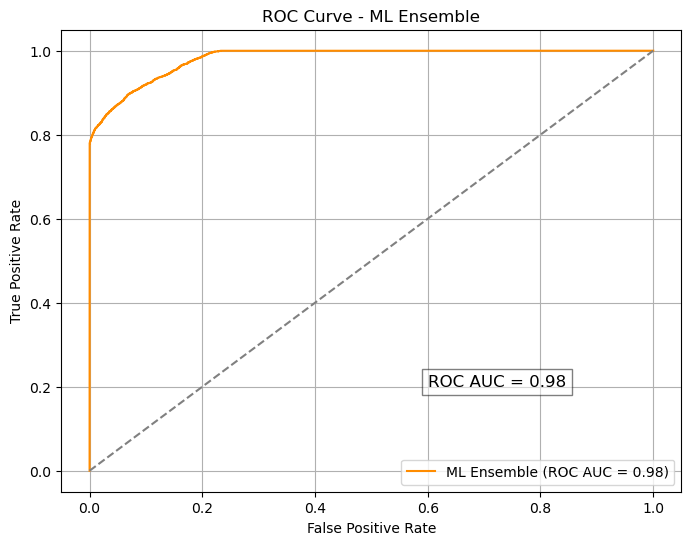

<Figure size 800x600 with 0 Axes>

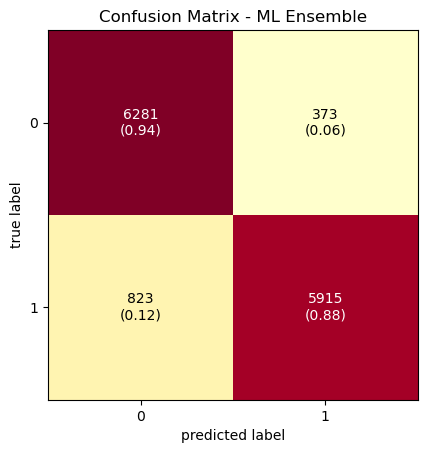

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Plot ROC curve for ML ensemble
ensemble_probs = ensemble.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_probs)
roc_auc_ensemble = roc_auc_score(y_test, ensemble_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f'ML Ensemble (ROC AUC = {roc_auc_ensemble:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML Ensemble')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_ensemble:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for ML Ensemble
cm_ensemble = confusion_matrix(y_test, ensemble_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_ensemble, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - ML Ensemble')
plt.show()


## **ROC Curve and Confusion Matrix for Ensemble Stacking Classifier (ML Ensemble, RNN, DNN)**

419/419 [==============================] - 0s 262us/step


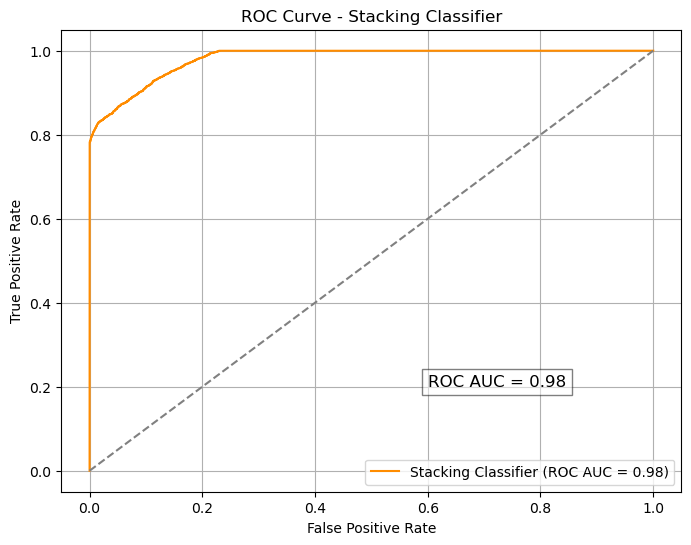

<Figure size 800x600 with 0 Axes>

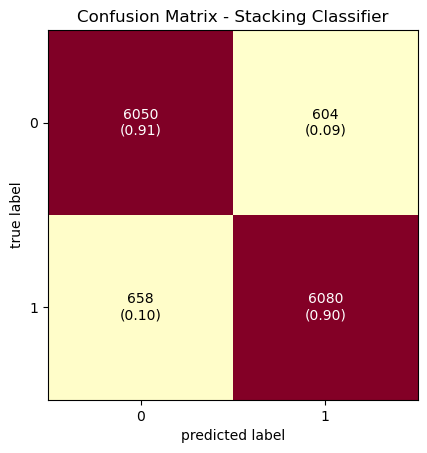

In [75]:
# Plot ROC curve for Stacking classifier
stacked_probs = ensemble_stack.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_stacked, tpr_stacked, _ = roc_curve(y_test, stacked_probs)
roc_auc_stacked = roc_auc_score(y_test, stacked_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_stacked, tpr_stacked, label=f'Stacking Classifier (ROC AUC = {roc_auc_stacked:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_stacked:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for Stacking classifier
cm_stacked = confusion_matrix(y_test, stacked_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_stacked, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()


In [79]:
class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)
        return predictions

    def predict_proba(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        probabilities = torch.sigmoid(outputs).detach().numpy()
        return np.column_stack((1 - probabilities, probabilities))

class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        return np.round(self.keras_model.predict(X)).astype(int)

    def predict_proba(self, X):
        probabilities = self.keras_model.predict(X)
        return np.column_stack((1 - probabilities, probabilities))


all_ensemble = VotingClassifier(estimators=[
    ('rnn', RNNWrapper(rnn_model)),
    ('keras', KerasWrapper(kdnn_model)),
    ('KNN', knn_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('CatBoost', catboost_model),
    ('XGBoost', xgb_model)
], voting='hard')


all_ensemble.fit(x_train, y_train)


all_pred = ensemble.predict(x_test)
accuracy = accuracy_score(y_test, all_pred)
print("Accuracy of Ensemble of DL and ML:", accuracy)

Learning rate set to 0.056385
0:	learn: 0.5548911	total: 6.22ms	remaining: 6.21s
1:	learn: 0.4543139	total: 11.8ms	remaining: 5.9s
2:	learn: 0.3779071	total: 17.3ms	remaining: 5.74s
3:	learn: 0.3260264	total: 22.9ms	remaining: 5.71s
4:	learn: 0.2885512	total: 27.9ms	remaining: 5.56s
5:	learn: 0.2583043	total: 32.4ms	remaining: 5.37s
6:	learn: 0.2339363	total: 37.3ms	remaining: 5.3s
7:	learn: 0.2168127	total: 42.8ms	remaining: 5.3s
8:	learn: 0.2028717	total: 48.7ms	remaining: 5.36s
9:	learn: 0.1973863	total: 53.7ms	remaining: 5.32s
10:	learn: 0.1894883	total: 59.4ms	remaining: 5.34s
11:	learn: 0.1831307	total: 63.9ms	remaining: 5.26s
12:	learn: 0.1781223	total: 69.2ms	remaining: 5.25s
13:	learn: 0.1732326	total: 75.2ms	remaining: 5.29s
14:	learn: 0.1693117	total: 79.7ms	remaining: 5.24s
15:	learn: 0.1669514	total: 84.2ms	remaining: 5.18s
16:	learn: 0.1640001	total: 89.1ms	remaining: 5.15s
17:	learn: 0.1625972	total: 93.4ms	remaining: 5.09s
18:	learn: 0.1613525	total: 98.1ms	remaining: 5

195:	learn: 0.1433592	total: 997ms	remaining: 4.09s
196:	learn: 0.1432841	total: 1s	remaining: 4.09s
197:	learn: 0.1432543	total: 1.01s	remaining: 4.08s
198:	learn: 0.1432164	total: 1.01s	remaining: 4.08s
199:	learn: 0.1431677	total: 1.02s	remaining: 4.07s
200:	learn: 0.1431180	total: 1.02s	remaining: 4.07s
201:	learn: 0.1430851	total: 1.03s	remaining: 4.06s
202:	learn: 0.1430363	total: 1.03s	remaining: 4.06s
203:	learn: 0.1429721	total: 1.04s	remaining: 4.05s
204:	learn: 0.1429260	total: 1.04s	remaining: 4.05s
205:	learn: 0.1428767	total: 1.05s	remaining: 4.04s
206:	learn: 0.1428339	total: 1.05s	remaining: 4.04s
207:	learn: 0.1427092	total: 1.06s	remaining: 4.03s
208:	learn: 0.1426465	total: 1.06s	remaining: 4.03s
209:	learn: 0.1426049	total: 1.07s	remaining: 4.02s
210:	learn: 0.1425645	total: 1.07s	remaining: 4.01s
211:	learn: 0.1425104	total: 1.08s	remaining: 4.01s
212:	learn: 0.1424818	total: 1.08s	remaining: 4s
213:	learn: 0.1424444	total: 1.09s	remaining: 4s
214:	learn: 0.1423857

355:	learn: 0.1358413	total: 1.8s	remaining: 3.26s
356:	learn: 0.1358052	total: 1.81s	remaining: 3.26s
357:	learn: 0.1357696	total: 1.81s	remaining: 3.25s
358:	learn: 0.1357352	total: 1.82s	remaining: 3.25s
359:	learn: 0.1356795	total: 1.82s	remaining: 3.25s
360:	learn: 0.1356135	total: 1.83s	remaining: 3.24s
361:	learn: 0.1355720	total: 1.83s	remaining: 3.23s
362:	learn: 0.1355171	total: 1.84s	remaining: 3.23s
363:	learn: 0.1354927	total: 1.85s	remaining: 3.23s
364:	learn: 0.1354290	total: 1.85s	remaining: 3.22s
365:	learn: 0.1353924	total: 1.86s	remaining: 3.22s
366:	learn: 0.1353417	total: 1.86s	remaining: 3.21s
367:	learn: 0.1353017	total: 1.87s	remaining: 3.21s
368:	learn: 0.1352644	total: 1.87s	remaining: 3.2s
369:	learn: 0.1352361	total: 1.88s	remaining: 3.2s
370:	learn: 0.1351972	total: 1.88s	remaining: 3.19s
371:	learn: 0.1351583	total: 1.89s	remaining: 3.19s
372:	learn: 0.1351062	total: 1.89s	remaining: 3.18s
373:	learn: 0.1350692	total: 1.9s	remaining: 3.18s
374:	learn: 0.13

543:	learn: 0.1283681	total: 2.8s	remaining: 2.35s
544:	learn: 0.1283335	total: 2.81s	remaining: 2.35s
545:	learn: 0.1283070	total: 2.82s	remaining: 2.34s
546:	learn: 0.1282804	total: 2.82s	remaining: 2.34s
547:	learn: 0.1282400	total: 2.83s	remaining: 2.33s
548:	learn: 0.1282128	total: 2.83s	remaining: 2.33s
549:	learn: 0.1281854	total: 2.84s	remaining: 2.32s
550:	learn: 0.1281402	total: 2.84s	remaining: 2.31s
551:	learn: 0.1281124	total: 2.85s	remaining: 2.31s
552:	learn: 0.1280571	total: 2.85s	remaining: 2.31s
553:	learn: 0.1280334	total: 2.86s	remaining: 2.3s
554:	learn: 0.1279821	total: 2.86s	remaining: 2.29s
555:	learn: 0.1279549	total: 2.87s	remaining: 2.29s
556:	learn: 0.1279139	total: 2.87s	remaining: 2.29s
557:	learn: 0.1278762	total: 2.88s	remaining: 2.28s
558:	learn: 0.1278287	total: 2.88s	remaining: 2.27s
559:	learn: 0.1277977	total: 2.89s	remaining: 2.27s
560:	learn: 0.1277696	total: 2.9s	remaining: 2.27s
561:	learn: 0.1277441	total: 2.9s	remaining: 2.26s
562:	learn: 0.12

738:	learn: 0.1215833	total: 3.81s	remaining: 1.34s
739:	learn: 0.1215532	total: 3.81s	remaining: 1.34s
740:	learn: 0.1215205	total: 3.82s	remaining: 1.33s
741:	learn: 0.1214933	total: 3.82s	remaining: 1.33s
742:	learn: 0.1214515	total: 3.83s	remaining: 1.32s
743:	learn: 0.1214215	total: 3.83s	remaining: 1.32s
744:	learn: 0.1213673	total: 3.84s	remaining: 1.31s
745:	learn: 0.1213391	total: 3.84s	remaining: 1.31s
746:	learn: 0.1213042	total: 3.85s	remaining: 1.3s
747:	learn: 0.1212800	total: 3.85s	remaining: 1.3s
748:	learn: 0.1212329	total: 3.86s	remaining: 1.29s
749:	learn: 0.1212034	total: 3.86s	remaining: 1.29s
750:	learn: 0.1211662	total: 3.87s	remaining: 1.28s
751:	learn: 0.1211230	total: 3.87s	remaining: 1.28s
752:	learn: 0.1210976	total: 3.88s	remaining: 1.27s
753:	learn: 0.1210765	total: 3.88s	remaining: 1.27s
754:	learn: 0.1210382	total: 3.89s	remaining: 1.26s
755:	learn: 0.1210068	total: 3.89s	remaining: 1.26s
756:	learn: 0.1209601	total: 3.9s	remaining: 1.25s
757:	learn: 0.1

916:	learn: 0.1158231	total: 4.81s	remaining: 436ms
917:	learn: 0.1157956	total: 4.82s	remaining: 430ms
918:	learn: 0.1157625	total: 4.82s	remaining: 425ms
919:	learn: 0.1157287	total: 4.83s	remaining: 420ms
920:	learn: 0.1156928	total: 4.84s	remaining: 415ms
921:	learn: 0.1156585	total: 4.84s	remaining: 410ms
922:	learn: 0.1156247	total: 4.85s	remaining: 405ms
923:	learn: 0.1155908	total: 4.86s	remaining: 399ms
924:	learn: 0.1155531	total: 4.86s	remaining: 394ms
925:	learn: 0.1155144	total: 4.87s	remaining: 389ms
926:	learn: 0.1154935	total: 4.87s	remaining: 384ms
927:	learn: 0.1154556	total: 4.88s	remaining: 379ms
928:	learn: 0.1154350	total: 4.88s	remaining: 373ms
929:	learn: 0.1154123	total: 4.89s	remaining: 368ms
930:	learn: 0.1153878	total: 4.89s	remaining: 363ms
931:	learn: 0.1153653	total: 4.9s	remaining: 357ms
932:	learn: 0.1153454	total: 4.91s	remaining: 352ms
933:	learn: 0.1153151	total: 4.91s	remaining: 347ms
934:	learn: 0.1152972	total: 4.92s	remaining: 342ms
935:	learn: 0

In [80]:
all_ensemble_accuracy = metrics.accuracy_score(y_test, all_pred)
all_ensemble_precision = precision_score(y_test, all_pred)
all_ensemble_recall = recall_score(y_test, all_pred)
all_ensemble_f1 = f1_score(y_test, all_pred)
all_ensemble_roc_auc = roc_auc_score(y_test, all_pred)

print("Ensemble of DL and ML Metrics:")
print(f"Accuracy: {all_ensemble_accuracy:.4f}")
print(f"Precision: {all_ensemble_precision:.4f}")
print(f"Recall: {all_ensemble_recall:.4f}")
print(f"F1 Score: {all_ensemble_f1:.4f}")
print(f"ROC AUC Score: {all_ensemble_roc_auc:.4f}")

Ensemble of DL and ML Metrics:
Accuracy: 0.9107
Precision: 0.9407
Recall: 0.8779
F1 Score: 0.9082
ROC AUC Score: 0.9109
